# Linear regression zero weights initialization

Import Dependencies

In [17]:
%matplotlib inline
import torch
from d2l import torch as d2l

Define Linear Regression Model and Optimization Algorithm for Training
(Same as in textbook example)

In [18]:
class LinearRegressionScratch(d2l.Module):  #@save
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)
        
@d2l.add_to_class(LinearRegressionScratch)  #@save
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

@d2l.add_to_class(LinearRegressionScratch)  #@save
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

class SGD(d2l.HyperParameters):  #@save
    """Minibatch stochastic gradient descent."""
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()
                
@d2l.add_to_class(LinearRegressionScratch)  #@save
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

@d2l.add_to_class(d2l.Trainer)  #@save
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer)  #@save
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:  # To be discussed later
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1


Create a custom class the overrides the initialization of the LinearRegressionScratch class.

In [19]:
class LinearRegressionZeroWeights(LinearRegressionScratch):
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__(num_inputs, lr, sigma)
        self.w = torch.zeros((num_inputs, 1), requires_grad=True)

Print the weights

In [20]:
model = LinearRegressionZeroWeights(2, lr=0.03)
model.w

tensor([[0.],
        [0.]], requires_grad=True)

Train the model

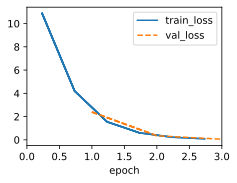

In [21]:
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

A similar result is produced with the zero weight initialization for the linear regression model

# Linear regression normal distribution with variance of 1000 initialization

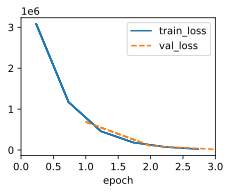

In [22]:
model = LinearRegressionScratch(2, lr=0.03, sigma=1000)
trainer.fit(model, data)

A similar result is produced with the zero weight initialization for the linear regression model, with the initial loss being much larger.

# MLP zero weights initialization

Imports

In [23]:
import tensorflow as tf
from d2l import tensorflow as d2l

MLP concise implementation, with zero weights

In [24]:

class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, kernel_initializer='zeros',
    bias_initializer='zeros', activation='relu'),
            tf.keras.layers.Dense(num_outputs, kernel_initializer='zeros',
    bias_initializer='zeros')])
     

Train the model

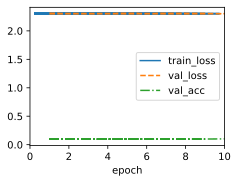

In [25]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

# MLP normal distribution with variance of 1000 initialization

Add Relu

In [27]:
def relu(X):
    return tf.math.maximum(X, 0)

Define model and train

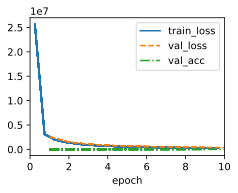

In [28]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=1000):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = tf.Variable(
            tf.random.normal((num_inputs, num_hiddens)) * sigma)
        self.b1 = tf.Variable(tf.zeros(num_hiddens))
        self.W2 = tf.Variable(
            tf.random.normal((num_hiddens, num_outputs)) * sigma)
        self.b2 = tf.Variable(tf.zeros(num_outputs))

@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = tf.reshape(X, (-1, self.num_inputs))
    H = relu(tf.matmul(X, self.W1) + self.b1)
    return tf.matmul(H, self.W2) + self.b2

model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

The model converges sharply, quickly reducing the large initial loss due to the normally distributed weights.